In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import imutils
import cv2
from datetime import datetime
from os.path import join
from SHD_functions import test, find_circles, crop_image, get_colors, find_PH
import seaborn as sns

In [2]:
# Assign data types for import
jpg = 'jpg'

# Create list of files
path = 'Data'
os.chdir(path)
files = [i for i in glob.glob('*.{}'.format(jpg))]
os.chdir('..')

In [3]:
def get_datetimes(files):
    dates = []
    for file in files:
        dates.append(datetime.strptime(file[4:-4], '%Y%m%d_%H%M%S'))
    return pd.Series(dates)

In [4]:
datetimes = get_datetimes(files)
datetimes

0   2018-11-03 10:18:43
1   2018-11-03 10:19:07
2   2018-11-03 10:19:42
3   2018-11-03 10:20:06
4   2018-11-03 10:20:30
5   2018-11-03 10:20:51
6   2018-11-03 10:22:21
dtype: datetime64[ns]

In [5]:
def get_pHs(files):
    pHs = []

    file_no = (i + 1 for i in range(len(files)))
    plt.figure(figsize=(18,50))
    
    for file in files:
        print(file)
        image = imutils.resize(cv2.imread(join(path, file)), width=1024)
        circles = find_circles(image)
        cropped = crop_image(image, circles)
        plt.subplot(len(files), 1, next(file_no))
        plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
        scale = get_colors(cropped, range(100, 600, 75), [200, 270, 380, 460])
        measurement = get_colors(cropped, [800], [200, 270])
        pH = find_PH(scale, measurement)
        pHs.append(pH)
    return pd.Series(pHs)

In [ ]:
pHs = get_pHs(files)
df = pd.DataFrame({'Date':datetimes, 'pH':pHs}).set_index('Date')
df.to_csv('pH_measurement.csv')

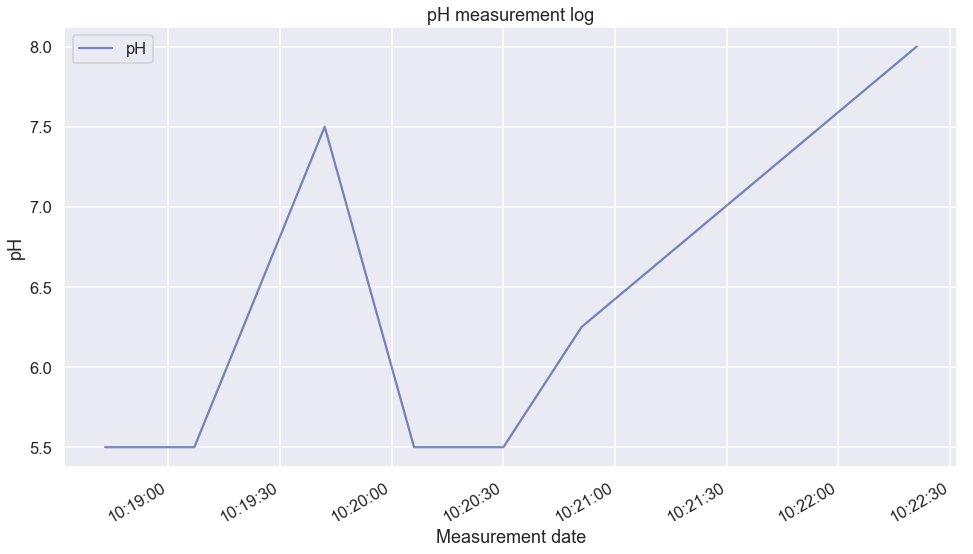

In [22]:
sns.set(style='darkgrid', palette='dark')
sns.set_context("talk")


df.plot(alpha=0.5, figsize=(16,9))
plt.title('pH measurement log')
plt.ylabel('pH')
plt.xlabel('Measurement date')
plt.show()